### Introduction

<p>This is my first documented project on Data Analysis and i will be working on the famous Titanic Dataset.
I'll be looking at characteristics of a sample of the passengers on the Titanic, including whether they survived or not, gender, age, parents and children, siblings/spouses, fare(cost of ticket), embarkation port.</p>

After looking at the contents of the dataset, i thought i should look into the following questions:<br><br>
<li>Which gender had a better chance of survival?</li>
<li>Which social class had a better chance of survial?</li>
<li>Which age group had a better chance of survival?</li>

### Setting up the report

In order to analyse and report on the data, i have chosen to use the Ipython Notebook(ipynb), along with other python modules
such as numpy, pandas, matplotlib, seaborn and many others.

In [68]:
#Importing modules for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
from numbers import Number
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Reading our dataset in CSV format

In [69]:
#Read our data into a dataframe and assign it to titanic_df variable
titanic_df = pd.read_csv("titanic.csv")

In [70]:
#Catching a glimpse into our dataframe
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Data Cleaning/Wrangling

In [71]:
#printing out information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [72]:
titanic_df.shape

(1310, 14)

In [73]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [74]:
titanic_df.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [75]:
titanic_df.iloc[-6:] # titanic_df.tail(6) also works

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping unwanted columns and rows

In our data, there are columns that won't be useful in our analysis and so they'll be dropped. These columns includes cabin, boat, body, home.dest, ticket and name.
It appears that the last row of the dataset(index 1309) has all its values as nan. We'll be dropping this row as it is irrelevant to our analysis

In [76]:
titanic_df.drop(columns=['cabin','boat','body','home.dest','name','ticket'], inplace=True)

In [77]:
titanic_df.drop(index=1309, inplace=True)

#### Dealing with missing ages

In [78]:
missing_ages = titanic_df[titanic_df['age'].isnull()]

In [79]:
titanic_df.age.isnull().sum()

263

From the above cell, we have 264 ages unaccounted for. So we'll fill them using the mean of all the ages in the dataset

In [80]:
#Filling missing ages with the mean of all the ages in the dataset.
titanic_df.age.fillna(titanic_df.age.mean(), inplace=True)

#### Filling the other missing data in the embarked column and the fare  column

In [81]:
titanic_df['embarked'].fillna(method='ffill', inplace=True)
titanic_df['fare'].fillna(titanic_df['fare'].mean(), inplace=True)

In [82]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(6), object(2)
memory usage: 92.0+ KB


#### Changing the datatypes in the dataframe

In [83]:
def convert(df):
    '''converts dataframe columns to int'''
    
    df['parch'] = df['parch'].astype(int)
    
    df['sibsp'] = df['sibsp'].astype(int)
    
    df['survived'] = df['survived'].astype(int)
    
    df['pclass'] = df['pclass'].astype(int)    
    
    df['age'] = df['age'].astype(int)
    
    return df
    
titanic_df = convert(titanic_df)    

In [84]:
titanic_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0,1,2,151.5500,S
2,1,0,female,2,1,2,151.5500,S
3,1,0,male,30,1,2,151.5500,S
4,1,0,female,25,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14,1,0,14.4542,C
1305,3,0,female,29,1,0,14.4542,C
1306,3,0,male,26,0,0,7.2250,C
1307,3,0,male,27,0,0,7.2250,C


titanic_df['parch'] = titanic_df['parch'].astype(int)
titanic_df['sibsp'] = titanic_df['sibsp'].astype(int)
titanic_df['survived'] = titanic_df['survived'].astype(int)
titanic_df['pclass'] = titanic_df['pclass'].astype(int)
titanic_df['age'] = titanic_df['age'].astype(int)

In [85]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int32  
 1   survived  1309 non-null   int32  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   int32  
 4   sibsp     1309 non-null   int32  
 5   parch     1309 non-null   int32  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(1), int32(5), object(2)
memory usage: 66.5+ KB


#### Dropping duplicates

In [86]:
titanic_df = titanic_df.drop_duplicates()

In [87]:
titanic_df.shape

(1106, 8)

In [88]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0,1,2,151.5500,S
2,1,0,female,2,1,2,151.5500,S
3,1,0,male,30,1,2,151.5500,S
4,1,0,female,25,1,2,151.5500,S


In [89]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1106 non-null   int32  
 1   survived  1106 non-null   int32  
 2   sex       1106 non-null   object 
 3   age       1106 non-null   int32  
 4   sibsp     1106 non-null   int32  
 5   parch     1106 non-null   int32  
 6   fare      1106 non-null   float64
 7   embarked  1106 non-null   object 
dtypes: float64(1), int32(5), object(2)
memory usage: 56.2+ KB


#### Reordering the Columns

In [90]:
titanic_df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [91]:
titanic_df = titanic_df[["age", "sex", "fare", "sibsp", "survived", "pclass", "embarked", "parch"]]

In [92]:
titanic_df.head()

,age,sex,fare,sibsp,survived,pclass,embarked,parch
0,29,female,211.3375,0,1,1,S,0
1,0,male,151.5500,1,1,1,S,2
2,2,female,151.5500,1,0,1,S,2
3,30,male,151.5500,1,0,1,S,2
4,25,female,151.5500,1,0,1,S,2


In [93]:
titanic_df.columns

Index(['age', 'sex', 'fare', 'sibsp', 'survived', 'pclass', 'embarked',
       'parch'],
      dtype='object')

#### Mapping data(values to descriptions)

In order to interprete the data easier, the following fields will be modeified as their data types are integers.<br><br>
<li>survived- changed to boolean(1=True, 0=False)</li>
<li>pclass- changed to socio-economic status(1=Upper Class, 2=Middle Class, 3=Lower Class)</li>
<li>embarked- changed to name of embarkation port(C=Cherbourg, Q=Queenstown, S=Southampton)</li>

A Family Size column will also be added so as to compare the size of families to the number of survivors.

In [94]:
titanic_df.shape

(1106, 8)

In [95]:
titanic_df.embarked.value_counts()

S    775
C    245
Q     86
Name: embarked, dtype: int64

In [96]:
def map_data(df):
    '''Function takes the original dataframe and returns a mapped/updated dataframe
    '''
    #survived map
    survived_map = {0:False, 1:True}
    df['survived'] = df['survived'].map(survived_map)
    
    #pclass map
    pclass_map = {3:'Lower Class', 2:'Middle Class', 1:'Upper Class'}
    df['pclass'] = df['pclass'].map(pclass_map)
    
    #embarked map
    embarked_map = {'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'}
    df['embarked'] = df['embarked'].map(embarked_map)
    
    # add new column (FamilySize) to dataframe -> sum of sibsp and parch
    df['FamilySize'] = df['sibsp'] + df['parch']
    
    return df

titanic_df = map_data(titanic_df)

In [97]:
titanic_df.head()

,age,sex,fare,sibsp,survived,pclass,embarked,parch,FamilySize
0,29,female,211.3375,0,True,Upper Class,Southampton,0,0
1,0,male,151.5500,1,True,Upper Class,Southampton,2,3
2,2,female,151.5500,1,False,Upper Class,Southampton,2,3
3,30,male,151.5500,1,False,Upper Class,Southampton,2,3
4,25,female,151.5500,1,False,Upper Class,Southampton,2,3


#### Grouping/Binning Ages

To make the ages easier to analyse i thought it would be a good idea to group idea to group/bin the ages. This way we can compare groups of ages instead of individual ages.

In [98]:
titanic_df.age.max()

80

In [99]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['age_group'] = pd.cut(titanic_df.age, range(0,81,10), right=False, labels=age_labels)

In [100]:
titanic_df.head()

,age,sex,fare,sibsp,survived,pclass,embarked,parch,FamilySize,age_group
0,29,female,211.3375,0,True,Upper Class,Southampton,0,0,20-29
1,0,male,151.5500,1,True,Upper Class,Southampton,2,3,0-9
2,2,female,151.5500,1,False,Upper Class,Southampton,2,3,0-9
3,30,male,151.5500,1,False,Upper Class,Southampton,2,3,30-39
4,25,female,151.5500,1,False,Upper Class,Southampton,2,3,20-29


### Number of survivors

Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the actual number of survivors.Based on the information provided by Kaggle, there were 2224 passengers and 722 survivors.

In [101]:
def as_percent(val, precision='0.2'):
    """Convert Number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")
        
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
       
    return percent

In [102]:
# passengers and number of survivors based on Kaggle's result
kaggle_passengers = 2224
kaggle_survivors = 722
kaggle_nonsurvivors = kaggle_passengers - kaggle_survivors

# Count number of passengers and survivors in sample data
sample_passengers = len(titanic_df)
sample_survivors = len(titanic_df[titanic_df.survived == True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = titanic_df[titanic_df.survived == True]
nonsurvivors_data = titanic_df[titanic_df.survived == False]

survivors = [
    ['Item', 'Kaggle(Count)', 'Kaggle(%)', 'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers', kaggle_passengers, '-', sample_passengers, '-'],
    ['Survivors', kaggle_survivors, calculate_percentage(kaggle_survivors, kaggle_passengers, True),
     
                  sample_survivors, calculate_percentage(sample_survivors, sample_passengers, True)],
    
    ['Non-survivors', kaggle_nonsurvivors, calculate_percentage(kaggle_nonsurvivors, kaggle_passengers, True),
     
                      sample_nonsurvivors, calculate_percentage(sample_nonsurvivors, sample_passengers, True)]
    
             ]

tbl.make_table(survivors)

Item,Kaggle(Count),Kaggle(%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,1106,-
Survivors,722,32.46%,464,41.95%
Non-survivors,1502,67.54%,642,58.05%


When comparing the number of survivors from the sample data to the actual number of survivors, we can see that there's a little gap but it can be written that the percentage of survivors is relatively close to eachother.

### Which gender had a better chance of survival?

In order to answer this question, we need to know how many males and females were on board and which gender had the highest survival rate.

#### Hypothesis

The hypothesis for this question is that gender impacts the chances of survival<br><br>
H0 = Gender has no impact on ability to survival<br>
H1 = Gender has impact on the ability to survive

#### Count of suvivors by gender

In [103]:
table = pd.crosstab(titanic_df['survived'], titanic_df['sex'])
print(table)

sex       female  male
survived              
False        115   527
True         313   151


#### Proportion of Survivors by Gender

In [104]:
print(titanic_df.groupby('sex').survived.mean())

sex
female    0.731308
male      0.222714
Name: survived, dtype: float64


In [105]:
plt.style.use('ggplot')

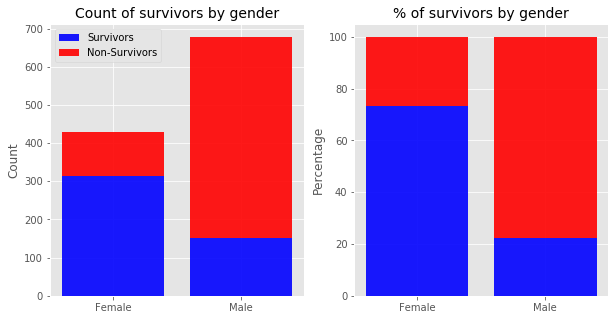

In [106]:
# calculate values for each survival status.
survivors_gender = survivors_data.groupby('sex').size().values
non_survivors_gender =  nonsurvivors_data.groupby('sex').size().values

#calculate the total survivors by gender so as to use it to calculate percentage.
total_survivors_gender = survivors_gender + non_survivors_gender

# i'll use the calculate_percentage function defined earlier to calculate the percentage of survivors by gender.
survivors_percentage_gender = calculate_percentage(survivors_gender, total_survivors_gender)*100
non_survivors_percentage_gender = calculate_percentage(non_survivors_gender, total_survivors_gender)*100


gender_categories = ['Female', 'Male']

# create a figure in which the charts/graphs will be placed in.
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

#plot chart for count of survivors by gender.
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=.9, color='blue')

ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, 
        bottom=survivors_gender, label='Non-Survivors', alpha=.9, color='red')
plt.sca(ax1)
plt.xticks([0.0, 1.0], labels=gender_categories)
#for x,y in zip()
#plt.annotate(label, )
ax1.set_ylabel('Count')
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender", fontsize=14)
plt.legend(loc='upper left');


#plot chart for percentage of survivors by gender.
ax2.bar(range(len(survivors_percentage_gender)), survivors_percentage_gender, alpha=.9, color='blue')

ax2.bar(range(len(non_survivors_percentage_gender)), non_survivors_percentage_gender, 
        bottom=survivors_percentage_gender, label='Non-Survivors', alpha=.9, color='red')
plt.sca(ax2)
plt.xticks([0.0, 1.0], labels=gender_categories)
ax2.set_ylabel('Percentage')
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender", fontsize=14);

The first plot above show that there were significantly more men than women on board the Titanic. The second plot(% survivors by gender) shows that Females had a higher proprtion(73.13%) of survivors compared to the proportion of Males(22.3%). This shows that females had a higher rate of survival.

In [107]:
table = pd.crosstab([titanic_df['survived']], titanic_df['sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
           ['Item', 'Value'], 
           ['Chi-Square Test', chi2], 
           ['P-Value', p]
          ]
tbl.make_table(results)

Item,Value
Chi-Square Test,276.6039
P-Value,0.0000


As the P-Value is less than 0.05, the probability that the gender will impact the chances of survival is high. Therefore we can neglect the null hypothesis, the plots above confirm this result.

### Which social class had a better chance of survival?

#### Hypothesis

The hypothesis for this question is that class affects the chances of survival <br><br>
H0 = Social Class has no impact on survivability<br>
H1 = Social Class has impact on survivability

#### Count of Survival by class

In [108]:
table = pd.crosstab(titanic_df['survived'], titanic_df['pclass'])
print(table)

pclass    Lower Class  Middle Class  Upper Class
survived                                        
False             399           128          115
True              154           111          199


#### Proportion of survivors by class

In [109]:
print(titanic_df.groupby('pclass').survived.mean())

pclass
Lower Class     0.278481
Middle Class    0.464435
Upper Class     0.633758
Name: survived, dtype: float64


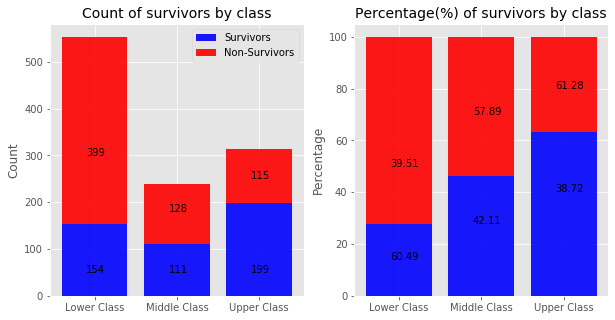

In [110]:
# calculate value for each survival class
survivors_class = survivors_data.groupby('pclass').size().values
non_survivors_class = nonsurvivors_data.groupby('pclass').size().values

# calculate total survivors 
total_survivors_class = survivors_class + non_survivors_class

survivors_percentage_class = calculate_percentage(survivors_class, total_survivors_class)*100
non_survivors_percentage_class = calculate_percentage(non_survivors_class, total_survivors_class)*100

class_categories = ['Lower Class', 'Middle Class', 'Upper Class']

# create a figure in which the charts/graphs will be placed in.
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot chart for count of survivors by class
ax1.bar(x=range(len(survivors_class)), height=survivors_class, label='Survivors', alpha=.9, color='blue')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, label='Non-Survivors', alpha=.9, 
        bottom=survivors_class, color='red')
plt.sca(ax1)
plt.xticks([0.0, 1.0, 2.0], class_categories)

ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class", fontsize=14)
plt.legend(loc='upper right');

#Adding Text to the survivor bars which is the lower part of each bar
ax1.text(-0.1, 50, survivors_class[0])
ax1.text(0.9,50 , survivors_class[1])
ax1.text(1.9, 50, survivors_class[2])

#Adding Text to the non survivors bars which is the upper part of each bar
ax1.text(-0.1, 300, non_survivors_class[0])
ax1.text(0.9,180 , non_survivors_class[1])
ax1.text(1.9, 250, non_survivors_class[2])


# plot chart for percentage of survivors by class
ax2.bar(range(len(survivors_percentage_class)), survivors_percentage_class, label='Survivors', alpha=.9, color='blue')
ax2.bar(range(len(non_survivors_percentage_class)), non_survivors_percentage_class, label='Non-Survivors', alpha=.9, 
        bottom=survivors_percentage_class, color='red')
plt.sca(ax2)
plt.xticks([0.0, 1.0, 2.0], class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("Percentage(%) of survivors by class", fontsize=14);

#ax = plt.gca()
#ax.axes.yaxis.set_ticklabels()
#plt.tick_params('y', labelsize=0, length=0)

#Adding text to the percentage chart survivors by class
ax2.text(-0.1, 14, round(survivors_percentage[0], 2))
ax2.text(0.9,28 , round(survivors_percentage[1], 2))
ax2.text(1.9, 40, round(survivors_percentage[2], 2))

ax2.text(-0.1, 50, round(non_survivors_percentage[0], 2))
ax2.text(0.9,70 , round(non_survivors_percentage[1], 2))
ax2.text(1.9, 80, round(non_survivors_percentage[2], 2));

The graphs above tells that while the Lower Class had more passengers than all classes and more survivors than the Middle Class, the Lower Class had the lowest survival rate(by percentage).

In [111]:
table = pd.crosstab([titanic_df['survived']], titanic_df['pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
           ['Item', 'Value'], 
           ['Chhi-Square Test', chi2], 
           ['P-Value', p]
         ]
tbl.make_table(results)

Item,Value
Chhi-Square Test,106.3316
P-Value,0.0000


As the P-Value is less than 0.05, the probability that the social class will impact the chances of survival is high. Therefore we can reject the null hypothesis. I think the plots above confirm the result.

### Which Age Group had a better chance of survival?

#### Hypothesis

The hypothesis for this question is that age group affects the chances of survival<br><br>
H0 = Age Group has no impact on survival chances
H1 = Age Group does have an impact on chances of survival

#### Distribution of Age Groups

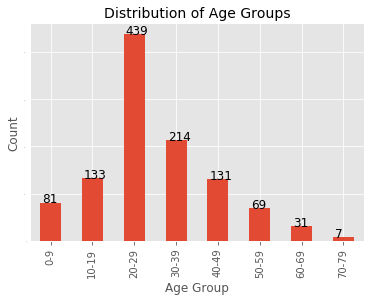

In [112]:
titanic_df.groupby('age_group').size().plot(kind='bar', stacked=True)
plt.title("Distribution of Age Groups", fontsize=14)
plt.tick_params('y', labelsize=0, length=0)

for i, v in enumerate(titanic_df.groupby('age_group').size().values):
    plt.text(i-0.2, v, v, fontsize=12)
plt.ylabel('Count')
plt.xlabel('Age Group');

From the plot above we can see that the majority of passengers are aged between 20-29

#### Proportion of survival by age group

In [113]:
print(titanic_df.groupby('age_group').survived.mean())

age_group
0-9      0.604938
10-19    0.421053
20-29    0.387244
30-39    0.439252
40-49    0.396947
50-59    0.449275
60-69    0.322581
70-79    0.142857
Name: survived, dtype: float64


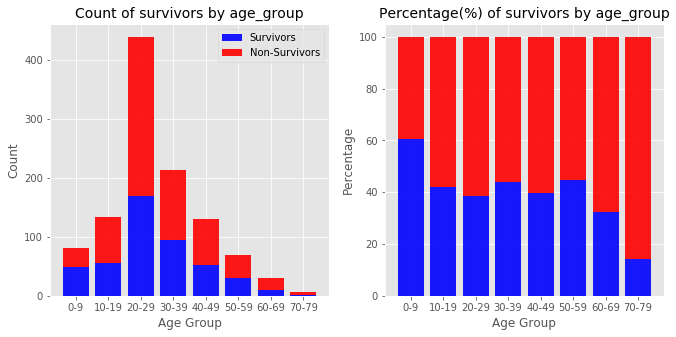

In [114]:
# calculate value for each survival status
survivors_age_group = survivors_data.groupby('age_group').size().values
non_survivors_age_group = nonsurvivors_data.groupby('age_group').size().values

#calculate totals for percentages
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
survivors_percentage = calculate_percentage(survivors_age_group, totals)*100
non_survivors_percentage = calculate_percentage(non_survivors_age_group, totals)*100

tick_spacing = np.array(range(len(age_labels)))

fig4, (ax1, ax2) = plt.subplots(1,2 , figsize=(11,5))
ax1.bar(x=range(len(survivors_age_group)), height=survivors_age_group, label='Survivors', alpha=.9, color='blue')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, label='Non-Survivors', alpha=.9, 
        bottom=survivors_age_group, color='red')

plt.sca(ax1)
plt.xticks(tick_spacing, age_labels)

ax1.set_ylabel("Count")
ax1.set_xlabel("Age Group")
ax1.set_title("Count of survivors by age_group", fontsize=14)
plt.legend(loc='upper right');

ax2.bar(range(len(survivors_percentage)), survivors_percentage, label='Survivors', alpha=.9, color='blue')
ax2.bar(range(len(non_survivors_percentage)), non_survivors_percentage, label='Non-Survivors', alpha=.9, 
        bottom=survivors_percentage, color='red')
plt.sca(ax2)
plt.xticks(tick_spacing, age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Age Group")
ax2.set_title("Percentage(%) of survivors by age_group", fontsize=14);

Looking at the Proportion(Count) and Percentage of survivors by age group, i think this analysis should be take into consideration the gender/sex of the passenger as well.

In [115]:
print(titanic_df.groupby(['sex', 'age_group']).survived.mean())

sex     age_group
female  0-9          0.631579
        10-19        0.734375
        20-29        0.675000
        30-39        0.783133
        40-49        0.782609
        50-59        0.923077
        60-69        0.800000
        70-79        1.000000
male    0-9          0.581395
        10-19        0.130435
        20-29        0.222222
        30-39        0.221374
        40-49        0.188235
        50-59        0.162791
        60-69        0.095238
        70-79        0.000000
Name: survived, dtype: float64


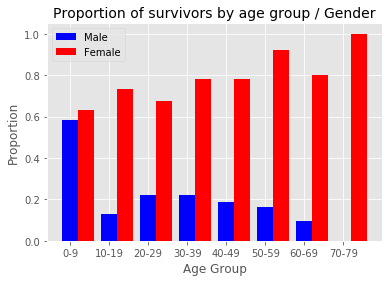

In [116]:
male_data = titanic_df[titanic_df.sex == 'male'].groupby('age_group').survived.mean().values
female_data = titanic_df[titanic_df.sex == 'female'].groupby('age_group').survived.mean().values

ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data, width=0.4, label='Male', color='blue')
ax.bar(female_plt_position, female_data, width=0.4, label='Female', color='red')
plt.xticks(tick_spacing, age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender", fontsize=14)
plt.legend(loc='best')
plt.show()

After relooking at the proportion of survivors by age group and gender, the data supports the notion of women and children to be given preferential treatment over men. The plot "Proportion of survivors by age group/Gender", shows that children(0-9 years old male and female) and women(all ages) had a much higher proportion of survivors. This supports the notion of the seats in the lifeboats been given to Women and Children first.

In [117]:
table = pd.crosstab([titanic_df['survived']], titanic_df['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
           ['Item', 'Value'], 
           ['Chhi-Square Test', chi2], 
           ['P-Value', p]
         ]
tbl.make_table(results)

Item,Value
Chhi-Square Test,17.5830
P-Value,0.0140


As the P-Value is less than 0.05 the probability that the age group will impact the chances of survival is high. Therefore, we can neglect the null hypothesis.

### Conclusion

#### Limitations of dataset

There are a number of limitations with the Titanic Dataset, which are caused by
<li>missing data</li>
<li>The data is a sample of the population</li>

##### Missing Ages

In [118]:
print(missing_ages.groupby('sex').size())

sex
female     78
male      185
dtype: int64


The above shows that there were 78 ages missing for females and 185 ages missing for males. I handled this by filling the missing ages with the mean of all the ages in the sample data which like everything else has Pros and Cons.

##### Data size

The size of the sample data could also impact the results as we don't know if there is a random sample or if the selection of the data is biased or unbiased

# DASHBOARD

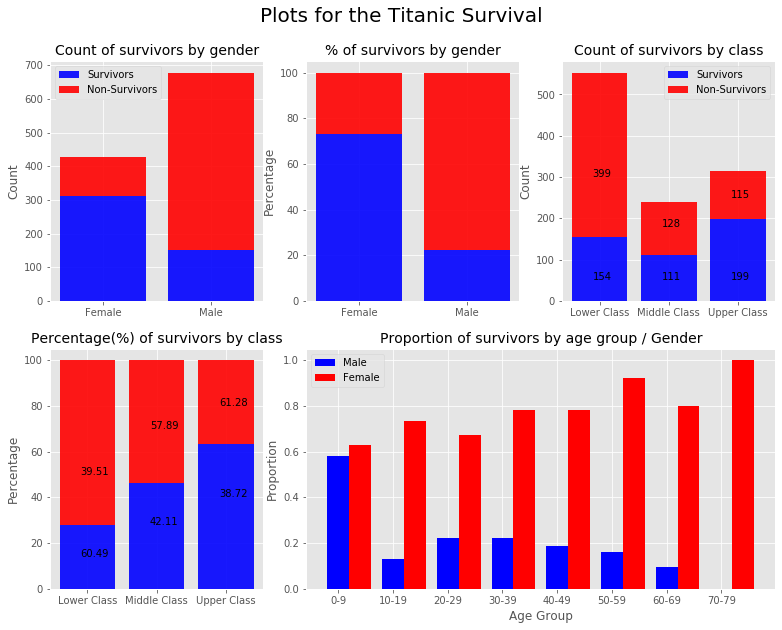

In [146]:
fig = plt.figure(0, figsize=(13,15))
ax1 = plt.subplot2grid((3  , 3), (0, 0), colspan=1)
#plot chart for count of survivors by gender.
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=.9, color='blue')

ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, 
        bottom=survivors_gender, label='Non-Survivors', alpha=.9, color='red')
plt.sca(ax1)
plt.xticks([0.0, 1.0], labels=gender_categories)
ax1.set_ylabel('Count')
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender", fontsize=14)
plt.legend(loc='upper left');


#plot chart for percentage of survivors by gender.
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2.bar(range(len(survivors_percentage_gender)), survivors_percentage_gender, alpha=.9, color='blue')

ax2.bar(range(len(non_survivors_percentage_gender)), non_survivors_percentage_gender, 
        bottom=survivors_percentage_gender, label='Non-Survivors', alpha=.9, color='red')
plt.sca(ax2)
plt.xticks([0.0, 1.0], labels=gender_categories)
ax2.set_ylabel('Percentage')
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender", fontsize=14);

ax3 = plt.subplot2grid((3, 3), (0,2), colspan=1)
ax3.bar(x=range(len(survivors_class)), height=survivors_class, label='Survivors', alpha=.9, color='blue')
ax3.bar(range(len(non_survivors_class)), non_survivors_class, label='Non-Survivors', alpha=.9, 
        bottom=survivors_class, color='red')
plt.sca(ax3)
plt.xticks([0.0, 1.0, 2.0], class_categories)

ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Count of survivors by class", fontsize=14)
plt.legend(loc='upper right');

#Adding Text to the survivor bars which is the lower part of each bar
ax3.text(-0.1, 50, survivors_class[0])
ax3.text(0.9,50 , survivors_class[1])
ax3.text(1.9, 50, survivors_class[2])

#Adding Text to the non survivors bars which is the upper part of each bar
ax3.text(-0.1, 300, non_survivors_class[0])
ax3.text(0.9,180 , non_survivors_class[1])
ax3.text(1.9, 250, non_survivors_class[2])


ax5 = plt.subplot2grid((3, 3), (1,0), colspan=1)
ax5.bar(range(len(survivors_percentage_class)), survivors_percentage_class, label='Survivors', alpha=.9, color='blue')
ax5.bar(range(len(non_survivors_percentage_class)), non_survivors_percentage_class, label='Non-Survivors', alpha=.9, 
        bottom=survivors_percentage_class, color='red')
plt.sca(ax5)
plt.xticks([0.0, 1.0, 2.0], class_categories)
ax5.set_ylabel("Percentage")
ax5.set_xlabel("")
ax5.set_title("Percentage(%) of survivors by class", fontsize=14);

ax5.text(-0.1, 14, round(survivors_percentage[0], 2))
ax5.text(0.9,28 , round(survivors_percentage[1], 2))
ax5.text(1.9, 40, round(survivors_percentage[2], 2))

ax5.text(-0.1, 50, round(non_survivors_percentage[0], 2))
ax5.text(0.9,70 , round(non_survivors_percentage[1], 2))
ax5.text(1.9, 80, round(non_survivors_percentage[2], 2));


ax6 = plt.subplot2grid((3, 3), (1,1), colspan=2)
ax6.bar(male_plt_position, male_data, width=0.4, label='Male', color='blue')
ax6.bar(female_plt_position, female_data, width=0.4, label='Female', color='red')
plt.xticks(tick_spacing, age_labels)
ax6.set_ylabel("Proportion")
ax6.set_xlabel("Age Group")
ax6.set_title("Proportion of survivors by age group / Gender", fontsize=14)
plt.legend(loc='best');

#fig.tight_layout(pad=6.0)
fig.suptitle("Plots for the Titanic Survival", fontsize=20, y=0.93);

In [149]:
fig.savefig("Titanic Data Analysis")